<a href="https://colab.research.google.com/github/DavidAMills/quickshift/blob/master/quickshift_felz_slic_compactwatershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

(3732, 3264)


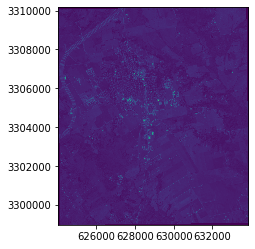

3732


In [2]:
src = rasterio.open("output.tif")
print(src.shape)
type(src)
rasterio.plot.show(src)
print(src.shape[0])

(3, 1244, 1088)


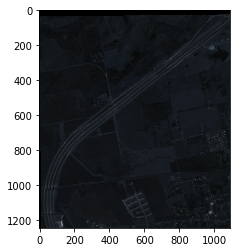

(3, 1244, 1088)


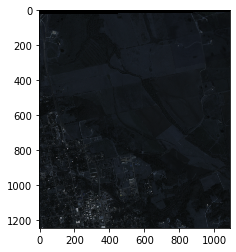

(3, 1244, 1088)


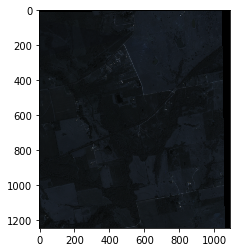

(3, 1244, 1088)


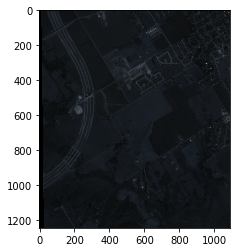

(3, 1244, 1088)


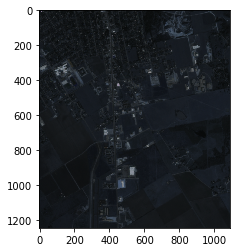

(3, 1244, 1088)


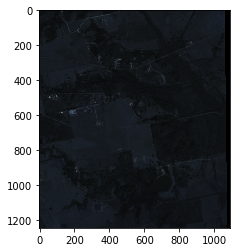

(3, 1244, 1088)


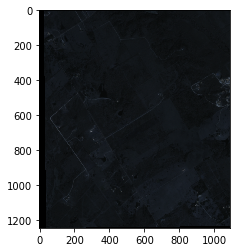

(3, 1244, 1088)


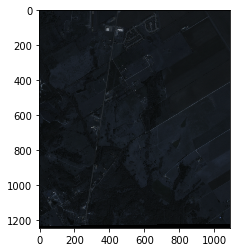

(3, 1244, 1088)


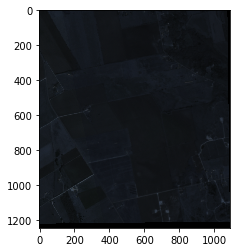

In [3]:
# define helpful functions for visualizing downloaded imagery
def show_rgb(img_file):
    with rasterio.open(img_file) as src:
        b,g,r,n = src.read()

    rgb = np.stack((r,g,b), axis=0)
    show(rgb/rgb.max())

x_corner = 0
y_corner = 0
x_inc = round(src.shape[1]/3)
y_inc = round(src.shape[0]/3)

image = [0,1,2,3,4,5,6,7,8]

# Loop through 3 image windows.
for i in range(9):
    x = i + 1
    if x % 3 == 0:
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, y_inc))
        x_corner = 0
        y_corner = y_corner + y_inc
    else:
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, y_inc))
        x_corner = x_corner + x_inc
    print(image[i].shape)
    rasterio.plot.show(image[i]/10000)

In [4]:
def segment_image(img,f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness):
    segments_fz = felzenszwalb(img, scale=f_scale, sigma=f_sigma, min_size=f_min_size)
    segments_slic = slic(img, n_segments=slic_segments, compactness=slic_compactness, sigma=slic_sigma)
    segments_quick = quickshift(img, kernel_size=quick_size, max_dist=quick_dist, ratio=quick_ratio)
    gradient = sobel(rgb2gray(img))
    segments_watershed = watershed(gradient, markers=w_markers, compactness=w_compactness)
    
    print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
    print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
    print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
    print(f"Compact Watershed number of segments: {len(np.unique(segments_watershed))}")
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    
    ax[0, 0].imshow(mark_boundaries(img/10000, segments_fz))
    ax[0, 0].set_title("Felzenszwalbs's method")
    ax[0, 1].imshow(mark_boundaries(img/10000, segments_slic))
    ax[0, 1].set_title('SLIC')
    ax[1, 0].imshow(mark_boundaries(img/10000, segments_quick))
    ax[1, 0].set_title('Quickshift')
    ax[1, 1].imshow(mark_boundaries(img/10000, segments_watershed))
    ax[1, 1].set_title('Compact watershed')

    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

Equal weight given to color space and distance.
Felzenszwalb number of segments: 4052
SLIC number of segments: 2538
Quickshift number of segments: 2621
Compact Watershed number of segments: 2538


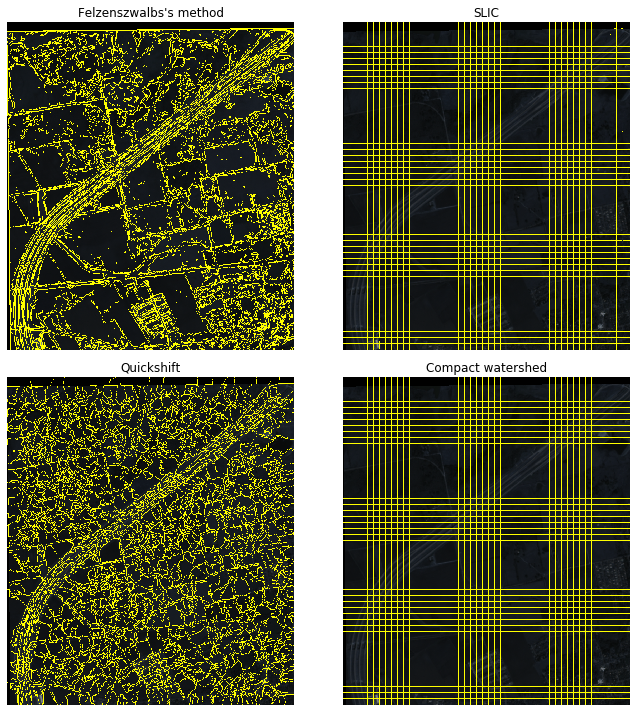

In [14]:
f_scale = 5
f_sigma = 0.50
f_min_size = 5
slic_segments = 2500
slic_compactness = 10
slic_sigma = .5
quick_size = 10
quick_dist = 6
quick_ratio = .5
w_markers = 2500
w_compactness = 0.1

for i in range(0,1):
    image[i] = np.transpose(image[i],[1,2,0])
    if i == 0:
      print("Equal weight given to color space and distance.")
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)
    if i == 1:
      print("Max weight given to color space.")
      quick_ratio = 1
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)
    if i == 2:
      print("Max weight given to color distance.")
      quick_ratio = 0
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)